# Import data from SQL database

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# create a database connection
sqluser = 'postgres'
dbname = 'mimic'
schema_name = 'mimiciii'

# Connect to local postgres version of mimic
con = psycopg2.connect(dbname=dbname, user=sqluser, password =sqluser )
cur = con.cursor()

In [3]:
# Commands to run .sql file in CMD 

# psql "dbname=mimic user=postgres"
# \i all_data.sql 

# SQL query (gets all_data view defined elsewhere)
query = \
"""
select * from all_data
"""

# Perform SQL query
cur.execute('SET search_path to ' + schema_name)
data = pd.read_sql_query(query,con)

# Preliminary statistics

In [18]:
# store the data into csv
data.to_csv('data.csv',index=False)

In [4]:
data.shape

(57996, 44)

In [5]:
print ('Number of unique patient ids: {}'.format(len(data.subject_id.unique())))

Number of unique patient ids: 34005


## Describe numerical data 

In [16]:
data[['age','sapsii','sofa']].describe()

,age,sapsii,sofa
count,57996.000000,57996.000000,57996.000000
mean,75.415010,36.797400,4.556797
std,53.924155,14.494745,3.241760
min,14.911113,0.000000,0.000000
25%,54.070590,27.000000,2.000000
50%,66.827321,35.000000,4.000000
75%,78.174955,45.000000,6.000000
max,310.280859,118.000000,22.000000


In [17]:
data.loc[data.age<300].age.describe()

count    55099.000000
mean        63.580520
std         16.022694
min         14.911113
25%         53.328980
50%         65.703551
75%         76.578615
max         89.003531
Name: age, dtype: float64

In [32]:
data[['resprate_min', 'resprate_max', 'resprate_mean',]].describe()

,resprate_min,resprate_max,resprate_mean
count,57981.000000,57981.000000,57981.000000
mean,9.782119,32.962557,19.375751
std,3.727347,9.072195,3.539746
min,0.170000,8.000000,7.333333
25%,7.000000,26.000000,16.846774
50%,10.000000,31.000000,19.040404
75%,12.000000,38.000000,21.526316
max,33.000000,69.000000,43.777778


In [22]:
data[['urea_n_min','urea_n_mean','urea_n_max',]].describe()

,urea_n_min,urea_n_mean,urea_n_max
count,57963.000000,57963.000000,57963.000000
mean,16.463710,27.333612,42.224557
std,13.314368,18.915366,31.176981
min,0.000000,1.421053,2.000000
25%,9.000000,14.500000,20.000000
50%,13.000000,21.285714,31.000000
75%,19.000000,34.500000,55.000000
max,161.000000,232.040000,290.000000


In [20]:
data[['magnesium_max','albumin_min','calcium_min']].describe()

,magnesium_max,albumin_min,calcium_min
count,57548.000000,41367.000000,56248.000000
mean,2.501767,2.799359,7.673363
std,1.012201,0.757489,0.863674
min,0.400000,0.900000,0.000000
25%,2.200000,2.200000,7.200000
50%,2.400000,2.700000,7.700000
75%,2.700000,3.300000,8.200000
max,58.000000,5.700000,17.900000


In [23]:
data[['glucose_min','glucose_mean','glucose_max']].describe()

,glucose_min,glucose_mean,glucose_max
count,57638.000000,57638.000000,57638.000000
mean,86.977461,137.750363,271.053735
std,30.178478,86.866399,5961.165184
min,0.106000,21.000000,21.000000
25%,70.000000,117.142857,157.000000
50%,86.000000,130.800000,197.000000
75%,101.000000,149.946429,265.000000
max,485.000000,17994.482143,999999.000000


In [24]:
data[['hr_min','hr_mean','hr_max']].describe()

,hr_min,hr_mean,hr_max
count,57994.000000,57994.000000,57994.000000
mean,62.747368,85.759691,118.006071
std,14.767748,13.134256,25.515820
min,0.350000,34.710000,39.000000
25%,54.000000,76.770000,99.000000
50%,63.000000,85.140000,116.000000
75%,72.000000,94.430000,134.000000
max,141.000000,163.880000,285.000000


In [25]:
data[['sysbp_min','sysbp_mean','sysbp_max']].describe()

,sysbp_min,sysbp_mean,sysbp_max
count,57988.000000,57988.000000,57988.000000
mean,79.984309,120.333388,165.783576
std,21.150334,15.593030,28.935278
min,0.060000,29.170000,45.000000
25%,70.000000,109.130000,145.000000
50%,81.000000,118.670000,162.000000
75%,93.000000,130.192500,183.000000
max,181.000000,215.830000,355.000000


In [26]:
data[['diasbp_min','diasbp_mean','diasbp_max']].describe()

,diasbp_min,diasbp_mean,diasbp_max
count,57988.00000,57988.000000,57988.000000
mean,35.72244,60.253103,99.736583
std,12.31615,9.708390,27.585497
min,0.32000,14.500000,25.000000
25%,27.00000,53.657500,82.000000
50%,36.00000,59.300000,95.000000
75%,44.00000,66.060000,111.000000
max,105.00000,117.870000,298.000000


In [27]:
data[['temp_min','temp_mean','temp_max']].describe()

,temp_min,temp_mean,temp_max
count,57907.000000,57907.000000,57907.000000
mean,35.625338,36.848842,37.977907
std,0.919910,0.527247,0.882785
min,15.000000,30.000000,30.000000
25%,35.277778,36.530000,37.333333
50%,35.666667,36.830000,37.888889
75%,36.111111,37.170000,38.500002
max,40.000000,40.120000,46.500000


In [28]:
data[['urine_min','urine_mean','urine_max']].describe()

,urine_min,urine_mean,urine_max
count,57985.000000,57985.000000,5.798500e+04
mean,25.898059,126.103510,6.679872e+02
std,62.026718,537.055435,1.935803e+04
min,0.000000,0.000000,0.000000e+00
25%,0.000000,77.000000,3.000000e+02
50%,15.000000,110.000000,4.500000e+02
75%,30.000000,149.000000,6.500000e+02
max,3100.000000,119965.000000,4.555555e+06


In [30]:
data[['platelets_min','platelets_mean','platelets_max']].describe()

,platelets_min,platelets_mean,platelets_max
count,57953.000000,57953.000000,57953.000000
mean,158.938562,238.752800,353.653012
std,93.330341,117.351249,195.654320
min,4.000000,9.562500,12.000000
25%,98.000000,161.750000,224.000000
50%,148.000000,221.448276,309.000000
75%,207.000000,296.000000,434.000000
max,1328.000000,1551.387097,2813.000000


## Describe categorical data 

In [70]:
data.gender.value_counts(dropna=False)

M    32392
F    25604
Name: gender, dtype: int64

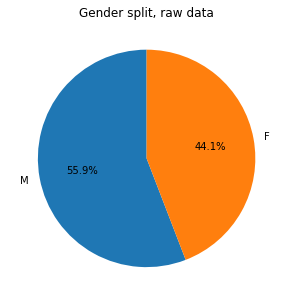

In [82]:
fig = plt.figure(figsize=(5,5))
data.gender.value_counts(dropna=False).plot.pie(startangle = 90, autopct='%1.1f%%')
plt.title('Gender split, raw data')
plt.ylabel('')
# plt.savefig('figures/raw_gender.png')
plt.show()

In [69]:
data.marital_status.value_counts(dropna=False)

MARRIED              27989
SINGLE               14024
WIDOWED               8304
DIVORCED              3821
NaN                   2826
SEPARATED              616
UNKNOWN (DEFAULT)      400
LIFE PARTNER            16
Name: marital_status, dtype: int64

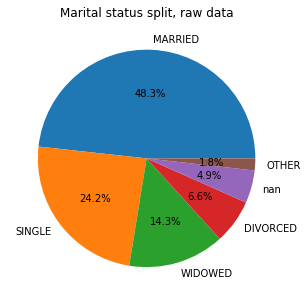

In [83]:
# reorganize for better plotting 
plotting = (data.marital_status.value_counts(dropna=False))
plotting['OTHER'] = plotting['UNKNOWN (DEFAULT)'] + plotting['LIFE PARTNER'] + plotting['SEPARATED']
plotting = plotting.drop(['UNKNOWN (DEFAULT)', 'LIFE PARTNER', 'SEPARATED'])
plotting

fig = plt.figure(figsize=(5,5))
plotting.plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('Marital status split, raw data')
plt.ylabel('')
# fig.savefig('figures/raw_marital.png')
plt.show()

In [67]:
data.insurance.value_counts(dropna=False)

Medicare      33146
Private       18074
Medicaid       4883
Government     1371
Self Pay        522
Name: insurance, dtype: int64

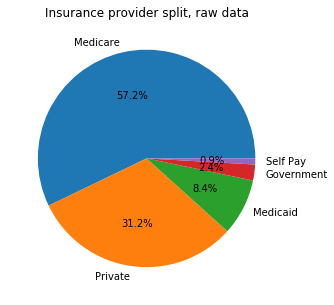

In [84]:
fig = plt.figure(figsize=(5,5))
data.insurance.value_counts(dropna=False).plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('Insurance provider split, raw data')
plt.ylabel('')
# fig.savefig('figures/raw_insurance.png')
plt.show()

In [81]:
data.first_careunit.value_counts(dropna=False)

MICU     20431
CSRU     10857
SICU     10777
CCU       8167
TSICU     7764
Name: first_careunit, dtype: int64

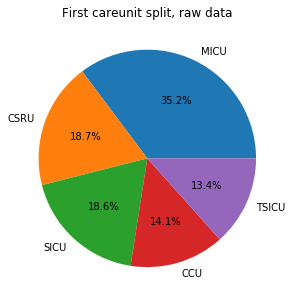

In [86]:
fig = plt.figure(figsize=(5,5))
data.first_careunit.value_counts(dropna=False).plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('First careunit split, raw data')
plt.ylabel('')
# fig.savefig('figures/raw_insurance.png')
plt.show()

In [87]:
data.last_careunit.value_counts(dropna=False)

MICU     20853
SICU     11277
CSRU     10862
CCU       7670
TSICU     7334
Name: last_careunit, dtype: int64

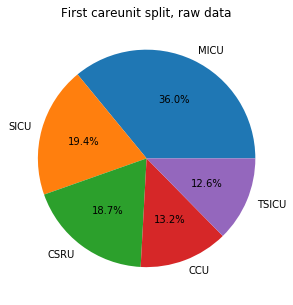

In [88]:
fig = plt.figure(figsize=(5,5))
data.last_careunit.value_counts(dropna=False).plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('First careunit split, raw data')
plt.ylabel('')
plt.show()

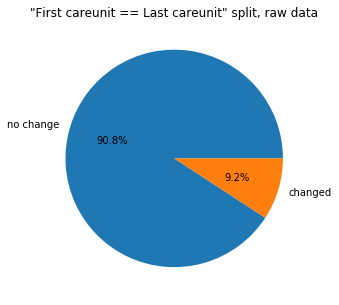

In [109]:
plotting = pd.Series(np.where(data.first_careunit == data.last_careunit, 'no change', 'changed'))
fig = plt.figure(figsize=(5,5))
plotting.value_counts(dropna=False).plot.pie(startangle = 0, autopct='%1.1f%%')
plt.title('"First careunit == Last careunit" split, raw data')
plt.ylabel('')
plt.show()

In [79]:
data.dod.describe()

count                   28655
unique                  11865
top       2191-04-07 00:00:00
freq                      107
first     2100-08-19 00:00:00
last      2211-06-10 00:00:00
Name: dod, dtype: object

## Check the missing data 

In [75]:
np.sum(data.isnull())

subject_id            0
hadm_id               0
admittime             0
dischtime             0
deathtime         48877
dod               29341
first_careunit        0
last_careunit         0
age                   0
gender                0
marital_status     2826
insurance             0
urea_n_min           33
urea_n_max           33
urea_n_mean          33
platelets_min        43
platelets_max        43
platelets_mean       43
magnesium_max       448
albumin_min       16629
calcium_min        1748
resprate_min         15
resprate_max         15
resprate_mean        15
glucose_min         358
glucose_max         358
glucose_mean        358
hr_min                2
hr_max                2
hr_mean               2
sysbp_min             8
sysbp_max             8
sysbp_mean            8
diasbp_min            8
diasbp_max            8
diasbp_mean           8
temp_min             89
temp_max             89
temp_mean            89
sapsii                0
sofa                  0
urine_min       

### Extract readmission time information

In [12]:
# calculate time delta between subsequent readmissions of the same patient 
data['readmit_dt'] = np.zeros(data.shape[0])
data['next_readmit_dt'] = np.zeros(data.shape[0])
data['readmit_last_careunit'] = None

for idx in np.arange(1,data.shape[0]):
    if data.subject_id[idx] == data.subject_id[idx - 1]:     
        prev_disch = data.dischtime[idx-1]
        curr_adm = data.admittime[idx]
        dt = curr_adm - prev_disch
        dt_hrs_calc = np.round(dt.value/3600.0/1e9,2)

#         data.set_value(idx,'adm_num',data['adm_num'][idx-1] + 1) 
        data.set_value(idx,'readmit_dt',dt_hrs_calc)
        data.set_value(idx-1,'next_readmit_dt',dt_hrs_calc)
        data.set_value(idx,'readmit_last_careunit',data['last_careunit'][idx-1]) 


C:\Users\64877\Anaconda3\envs\DS_final\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\64877\Anaconda3\envs\DS_final\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\64877\Anaconda3\envs\DS_final\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()


In [13]:
data.shape

(57996, 46)

### Clean up missing or invalid values

In [14]:
data = data.drop(['urine_min','urine_mean','urine_max'], axis = 1) #Too noisy
data = data[data.readmit_dt >= 0] #Ignore cases where readmit_dt < 0, which result from duplicate records. 
data = data.ix[(data.deathtime.isnull())] #Remove cases where the patient died during stay
data = data.drop(['deathtime'], axis = 1) # Important to drop before dropna otherwise most of the data is lost
data = data.dropna(subset=data.keys()[:-1]).reset_index(drop = True) # Ignore NaN values in readmit_last_careunit

C:\Users\64877\Anaconda3\envs\DS_final\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
print ('Dataframe shape after removal of invalid values: \n{}'.format(data.shape))

Dataframe shape after removal of invalid values: 
(20922, 42)


### Define time threshold and corresponding labels

In [16]:
# Define threshold in hours
threshold = 30*24

In [17]:
# Define label column based on threshold
data['future_readmit'] = None
data['future_readmit'] = ['No' if dt == 0.0 else 'Yes' if dt<=threshold else 'No' for dt in data.next_readmit_dt]

In [18]:
print ('Value counts:')
print (data.future_readmit.value_counts())
print ('\nValue proportions:')
print (data.future_readmit.value_counts()/data.shape[0])

Value counts:
No     17988
Yes     2934
Name: future_readmit, dtype: int64

Value proportions:
No     0.859765
Yes    0.140235
Name: future_readmit, dtype: float64


### Focus on admittions to the MICU:

In [19]:
MICU_admits_clean = data.loc[data.first_careunit == 'MICU']

A quick look at the label distribution:

In [20]:
print ('Value counts:')
print (MICU_admits_clean.future_readmit.value_counts())
print ('\nValue proportions:')
print (MICU_admits_clean.future_readmit.value_counts()/MICU_admits_clean.shape[0])

Value counts:
No     7366
Yes    1160
Name: future_readmit, dtype: int64

Value proportions:
No     0.863946
Yes    0.136054
Name: future_readmit, dtype: float64


In [25]:
# Save clean dataset to csv
MICU_admits_clean.to_csv('MICU_admits_clean.csv', index=False)

In [42]:
(data.age>300).sum()

994